Notebook set-up
---------------

In [1]:
# This sets plots to display in-line by default
%matplotlib inline
import sys
# Import module, for high-level functions, no additional modules are needed
import plotmapper as MaP


# Creates an HTML button that hides/shows code cells
# Useful for lab notebook reports and research updates
# NOTE: this does not display well on GitHub.
MaP.create_code_button()

Initializing MaP sample
-----------------------

In [2]:
path = 'data/'
def kwargs(sample):
    kwargs = {"sample": sample,
              "profile": path+sample+"_rnasep_profile.txt",
              "ct": path+"RNaseP.ct",
              "ss": path+"RC_CRYSTAL_STRUCTURE.xrna",
              "rings": path+sample+"-rnasep.corrs",
              "pairs": path+sample+"-rnasep-pairmap.txt",
              "log": path+sample+"_shapemapper_log.txt",
              "dance_prefix": path+sample+"_rnasep",
              "deletions": path+"example-rnasep-deletions.txt",
              "fasta": path+"RNaseP-noSC.fasta",
              "pdb": path+"3dhs_Correct.pdb",
              "pdb_kwargs":{"chain": "A"}}
    return kwargs

example1 = MaP.Sample(**kwargs("example1"))
example2 = MaP.Sample(**kwargs("example2"))
example3 = MaP.Sample(**kwargs("example3"))
example4 = MaP.Sample(**kwargs("example4"))
samples = [example1, example2, example3, example4]

No handles with labels found to put in legend.


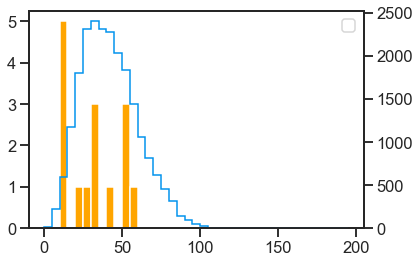

In [36]:
import matplotlib.pyplot as plt

# make list of all distances based on pdb
matrix = example1.data["pdb"].get_distance_matrix()
distances = []
for i, row in enumerate(matrix):
    distances.extend(row[i+6:])
# remove the no data filler value (1000)
distances = [x for x in distances if x != 1000]

#make list of rings distances
example1.data["pairs"].set_3d_distances(example1.data["pdb"])
ring_dists = example1.data["rings"].data["Distance"]
# remove no data
ring_dists = [x for x in ring_dists if x != 1000]

fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax.hist(ring_dists, bins=range(0,200,5), color='orange')
ax2.hist(distances, bins=range(0,200,5), histtype='step')